## Epsilon Decay

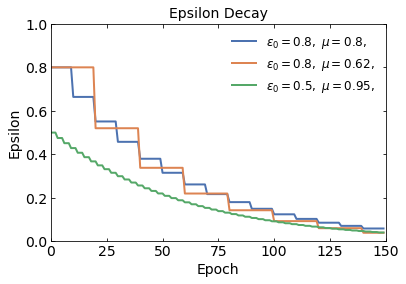

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd

epochs = 150
experiments = [
    {'top': 0.8, 'mu':0.83, 'epochs':epochs, 'wait':10, 'name':'$\epsilon_0=0.8, \; \mu=0.8, $'},
    {'top': 0.8, 'mu':0.65, 'epochs':epochs, 'wait':20, 'name':'$\epsilon_0=0.8, \; \mu=0.62,$'},
    {'top': 0.5, 'mu':0.95, 'epochs':epochs, 'wait': 3, 'name':'$\epsilon_0=0.5, \; \mu=0.95,$'},
]

def calculate_epsilons(top, mu, epochs, wait, lower_bound=0.01, **kwargs):
     return top * mu**(np.arange(epochs)//wait)

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_title('Epsilon Decay', fontsize=14)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Epsilon', fontsize=14)
ax.set_xlim(0,epochs)
ax.set_ylim(0,1)
ax.tick_params(bottom=True, top=True, left=True, right=True, direction='in', )
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False, labelsize=14)
colors = sns.color_palette("deep", as_cmap=True)
eps_list = []
for idx, exp in enumerate(experiments):
    epsilons = calculate_epsilons(**exp)
    eps_list.append(epsilons)
    ax.plot(epsilons, label= exp['name'], linestyle='-', color=colors[idx], linewidth=2)
# ax.legend(frameon=False, bbox_to_anchor=(1.04,1), loc="upper left", fontsize=12)
ax.legend(frameon=False, loc="upper right", fontsize=12)
# ax.yaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.savefig('fig/eps_decay.pdf', dpi=100, bbox_inches='tight')
plt.show()


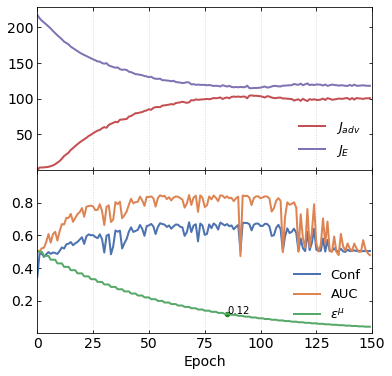

In [122]:
from pathlib import Path
from matplotlib.ticker import MaxNLocator

loss = Path('data/loss')
auc = pd.read_csv(loss/'val_auc2.csv')
conf = pd.read_csv(loss/'val_conf2.csv')

adv = pd.read_csv(loss/'loss_adv2.csv')
entropic = pd.read_csv(loss/'loss_entropic2.csv')

eps = eps_list[-1]

line = 2
font = 14
fig = plt.figure(figsize=(6,6))  
gs = fig.add_gridspec(2, 1, hspace=0.00, wspace=0.2)
axs = gs.subplots(sharex=True, sharey=False)
axs = axs.flat

colors = sns.color_palette("deep", as_cmap=True)
axs[1].plot(conf['Step'], conf['Value'], label='Conf', color=colors[0], linewidth=line)
axs[1].plot(auc['Step'], auc['Value'], label='AUC', color=colors[1], linewidth=line)
axs[1].plot(eps, label='$\epsilon^\mu$', color=colors[2], linewidth=line)
epc=85
axs[1].scatter([epc],[eps[epc]], color='green', alpha=0.9, s = 20)
axs[1].annotate('{0:.2f}'.format(eps[epc]), (epc, eps[epc]))

axs[1].set_ylim((0,1))
axs[1].set_xlim((0,150))

axs[0].plot(adv['Step'], adv['Value'], label = '$J_{adv}$', color=colors[3], linewidth=line)
axs[0].plot(entropic['Step'], entropic['Value'], label = '$J_{E}$', color=colors[4], linewidth=line)
# axs[0].plot(entropic['Step'], entropic['Value']+adv['Value'], label = '$J_{total}$', color=colors[5], linewidth=line)


axs[0].set_ylim((0,None))
plt.xlabel('Epoch', fontsize=font)


for ax in axs:
    ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, direction='in')
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True,
                    labelright=False, labelsize=font)
    ax.legend(frameon=False, loc='lower right', fontsize=font-1)
    ax.label_outer()
    ax.grid(axis='x', linestyle=':', linewidth=1, color='gainsboro')
   
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))
axs[1].yaxis.set_major_locator(MaxNLocator(nbins=6, prune='both'))

plt.savefig('fig/train_progress.pdf', dpi=100, bbox_inches='tight')
plt.show()


In [109]:
eps[80]

0.13176004723287102

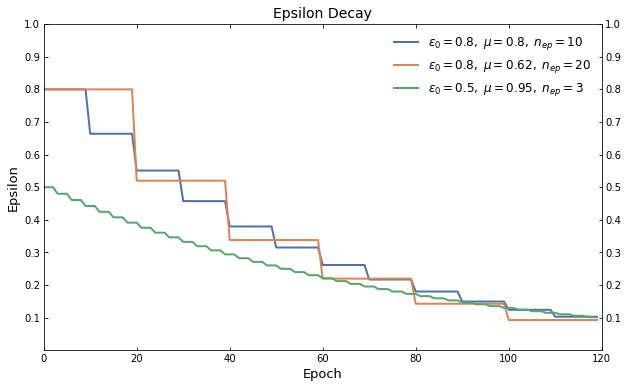

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

epochs = 120
experiments = [
    {'top': 0.8, 'mu':0.83, 'epochs':epochs, 'wait':10, 'name':'$\epsilon_0=0.8, \; \mu=0.8, \; n_{ep}=10$'},
    {'top': 0.8, 'mu':0.65, 'epochs':epochs, 'wait':20, 'name':'$\epsilon_0=0.8, \; \mu=0.62, \; n_{ep}=20$'},
    {'top': 0.5, 'mu':0.96, 'epochs':epochs, 'wait': 3, 'name':'$\epsilon_0=0.5, \; \mu=0.95, \; n_{ep}=3$'},
]

def calculate_epsilons(top, mu, epochs, wait, lower_bound=0.01, **kwargs):
     return top * mu**(np.arange(epochs)//wait)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_title('Epsilon Decay', fontsize=14)
ax.set_xlabel('Epoch', fontsize=13)
ax.set_ylabel('Epsilon', fontsize=13)
ax.set_xlim(0,epochs)
ax.set_ylim(0,1)
ax.tick_params(bottom=True, top=True, left=True, right=True, direction='in')
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=True, labelsize=10)
colors = sns.color_palette("deep", as_cmap=True)
for idx, exp in enumerate(experiments):
    epsilons = calculate_epsilons(**exp)
    ax.plot(epsilons, label= exp['name'], linestyle='-', color=colors[idx], linewidth=2)
# ax.legend(frameon=False, bbox_to_anchor=(1.04,1), loc="upper left", fontsize=12)
ax.legend(frameon=False, loc="upper right", fontsize=12)
ax.yaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.show()


## Image Gaussian Noise

In [ ]:
imagenet_path = Path("/local/scratch/datasets/ImageNet/ILSVRC2012/")
csv_file = 'data/p1/train.csv'
dataset = pd.read_csv(csv_file, header=None)
# np.random.seed(343441)
















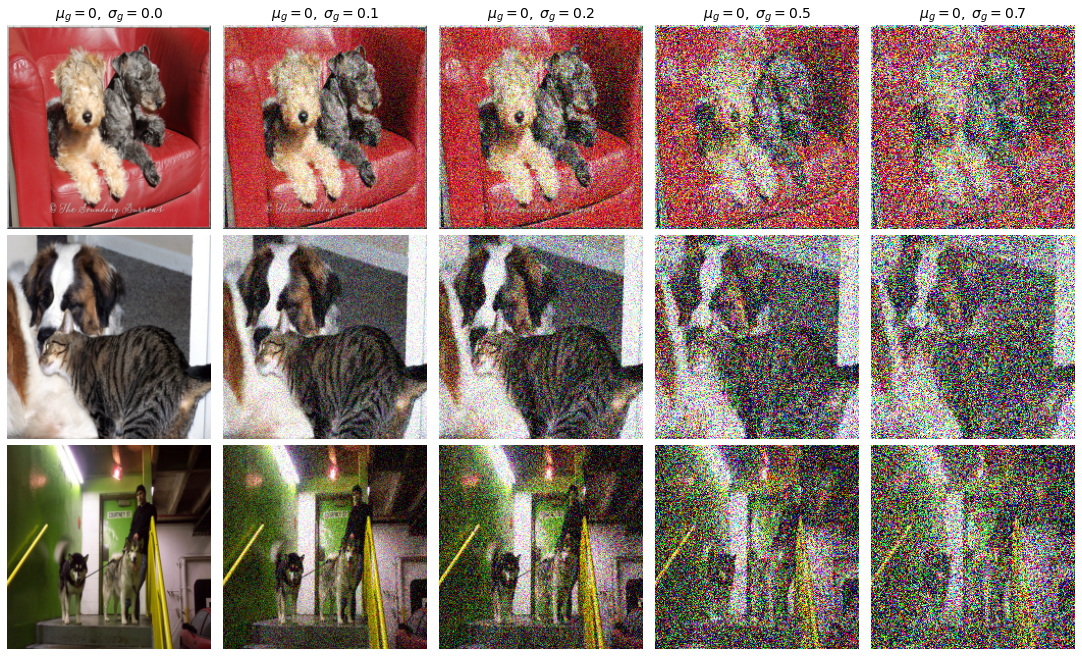

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

def add_gaussian_noise(im, loc=0, scale=0.1):
    noise = np.random.normal(loc, scale, size=im.shape)
    return np.clip(im + noise, a_min=0.0, a_max=1.0)

def add_random_noise(im, eps=0.1):
    noise = np.random.standard_normal(size=im.shape)
    noise = np.sign(noise)*eps
    return np.clip(im + noise, a_min=0.0, a_max=1.0)

np.random.seed(632)
imagenet_path = Path("/local/scratch/datasets/ImageNet/ILSVRC2012/")
csv_file = 'data/p1/train.csv'
df = pd.read_csv(csv_file, header=None)
# t = df.iloc[:,1]
# df = df[t >= 0] # Select known classes
idx = np.random.randint(0, len(df), size=3)
samples = df.iloc[idx, 0]
samples = [imagenet_path/sample for sample in samples]
samples = [np.asarray(Image.open(sample).resize([200,200], Image.BILINEAR))/255.0 for sample in samples]

gaussian_noise = [0.0, 0.1, 0.2, 0.5, 0.7]
num_im = len(samples)
num_noise = len(gaussian_noise)
fig, ax = plt.subplots(nrows=num_im, ncols=num_noise, figsize=(15,9), constrained_layout=True)
for i, im in enumerate(samples):
    for j, scale in enumerate(gaussian_noise):
        noise_im = add_gaussian_noise(im, loc=0, scale=scale)
        ax[i, j].imshow(noise_im)
        ax[i, j].set_axis_off()
        if i==0:
            ax[i, j].set_title('$\mu_g={}, \; \sigma_g={}$'.format(0, scale), fontsize=14)
plt.show()
plt.savefig('fig/p1_snap_GN.pdf', dpi=200, bbox_inches='tight')


## Image gradient visualization

In [2]:
import torch
import model
from torchvision import transforms as tf
from pathlib import Path
import numpy as np
from dataset import Imagenet_dataset
from collections import OrderedDict
import matplotlib.pyplot as plt
from losses import entropic_loss, objecto_loss
import pandas as pd

def load_checkpoint(model, resume, device='cpu'):
    checkpoint = torch.load(resume, map_location='cpu')
    key = list(checkpoint['model_state_dict'].keys())[0]
    if key[:6] == 'module': 
        new_state_dict = OrderedDict()
        for k, v in checkpoint['model_state_dict'].items():
            key = k[7:]  # remove 'module'
            new_state_dict[key] = v
        model.load_state_dict(new_state_dict)
    else:
        model.load_state_dict(checkpoint['model_state_dict'])
    del checkpoint
    
# Parameters
imagenet_path = Path("/local/scratch/datasets/ImageNet/ILSVRC2012/")
# csv_file = 'data/p1/train.csv'
csv_file = 'data/p1/train_kkp1.csv'
ckp_path = Path('outputs/e1n_w1_l1_e5_adam_d40_g0.3_full_FSA/e1n_w1_l1_e5_adam_d40_g0.3_full_FSA_curr.pth')
gpu = 'cuda:4'
np.random.seed(68)
df = pd.read_csv(csv_file, header=None)
# t = df.iloc[:,1]
# df = df[t >= 0] # Select known classes
# idx = np.random.randint(0, len(df), size=3)


train_tf = tf.Compose([tf.Resize((256)), tf.CenterCrop((224)),tf.ToTensor()]) # transformations
train_ds = Imagenet_dataset(csv_file, imagenet_path, train_tf) # create datasets
# create model
model = model.ResNet50(train_ds.label_cnt, train_ds.label_cnt, False)
# load model
load_checkpoint(model, ckp_path)
# set loss
loss = objecto_loss(train_ds.label_cnt)

def get_gradients(indices, train_ds, model):
    """Returns the samples and the gradients"""
    if isinstance(indices, int):
        x, t = train_ds[indices]
        x = x.unsqueeze(0)
        t = t.unsqueeze(0)
    else:
        samples, targets = [], []
        for ix in indices:
            x_, t_ = train_ds[ix]
            # print(x_.dtype)
            samples.append(x_)
            targets.append(t_)

        x = torch.stack(samples)
        t = torch.stack(targets)

    x.requires_grad_()
    x.grad = None
    logits, feat = model(x)
    j = loss(feat, logits, t, alpha=0.1)
    j.backward()
    return x.detach().numpy(), x.grad.detach().numpy()
    # return x, x.grad

def perturb_sample(x, epsilon, gradient):
    sign = np.sign(gradient)
    x_adv = x + epsilon*sign
    return np.clip(x_adv, a_min=0.0, a_max=1.0)

In [ ]:
# Images with background csv_file:data/p2/train.csv
# [33839, 181469, 96157, 62709, 19380, 23074, 92422, 10948, 30641]

In [6]:
np.random.seed(3028423)
df = pd.read_csv(csv_file, header=None)
# idx = np.random.randint(0, len(df), size=10)
idx = [96157, 23074, 30641]
# print(idx)
x, x_grad = get_gradients(idx, train_ds, model)

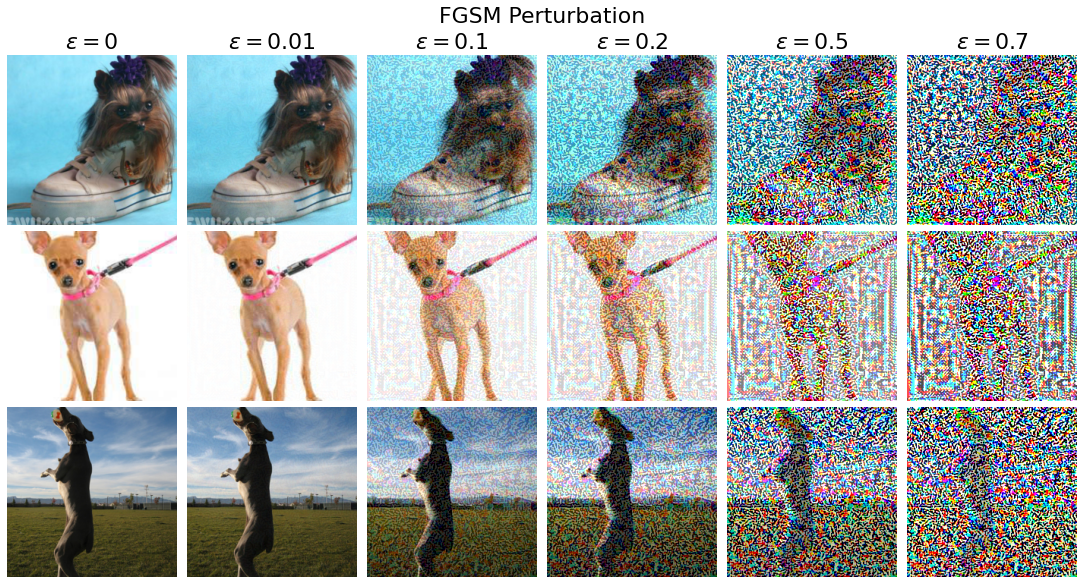

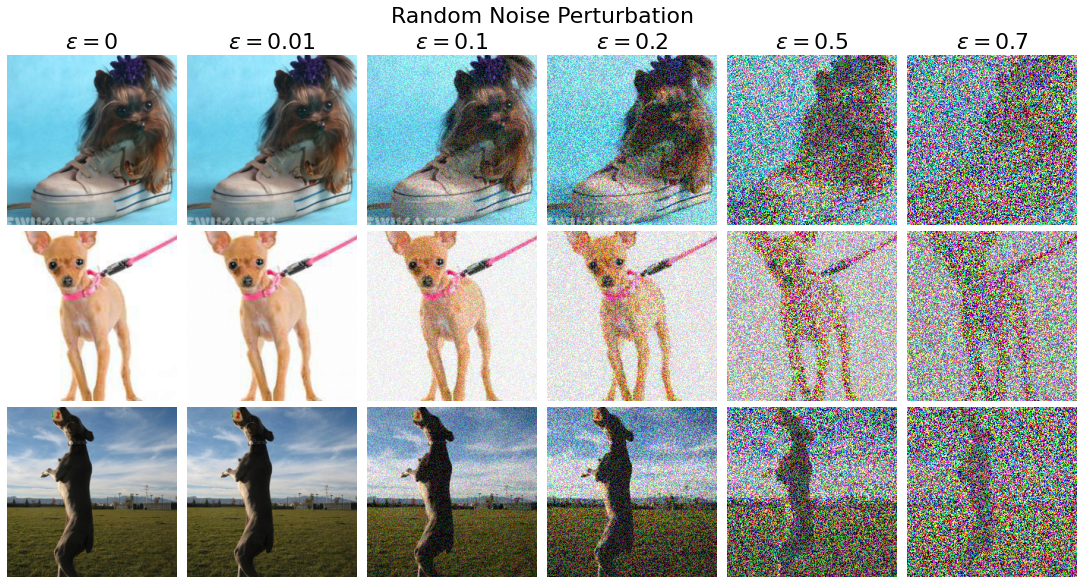

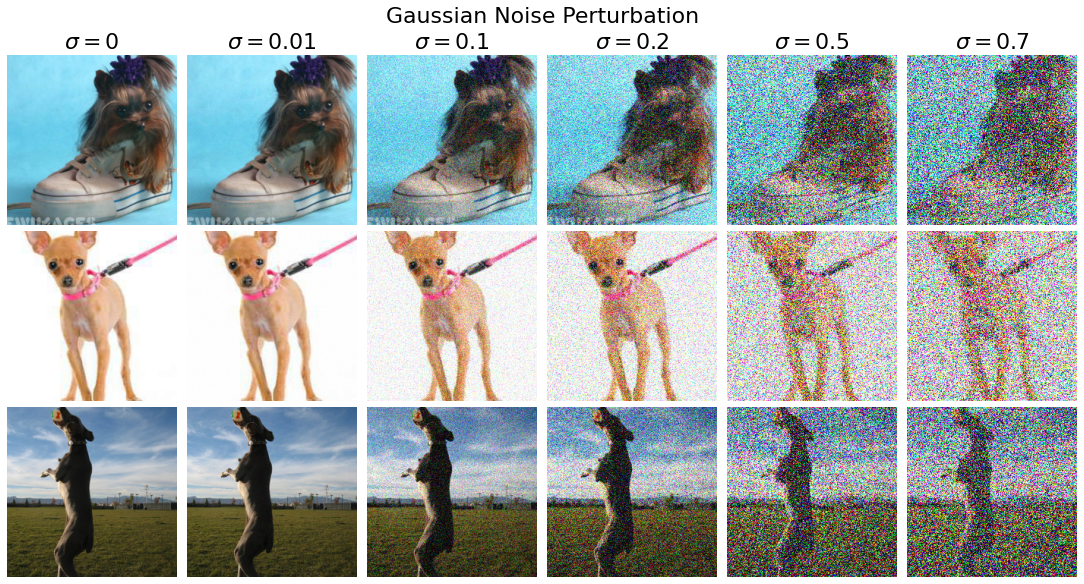

In [11]:
# FGSM
epsilons = [0, 0.01, 0.1, 0.2, 0.5, 0.7]
num_im = x.shape[0]
num_eps = len(epsilons)
fig, ax = plt.subplots(nrows=num_im, ncols=num_eps, figsize=(15,8), constrained_layout=True)
fig.suptitle('FGSM Perturbation', fontsize=22)
for i, sample in enumerate(x):
    for j, eps in enumerate(epsilons):
        im = perturb_sample(sample, eps, x_grad[i])
        im = np.einsum('chw->hwc', im)
        # im = (255*im).astype(np.uint8)
        ax[i, j].imshow(im)
        ax[i, j].set_axis_off()
        if i==0:
            ax[i, j].set_title('$\epsilon = {}$'.format(eps), fontsize=22)
plt.savefig('fig/method.p1_snap_fgsm.pdf', dpi=150, bbox_inches='tight')

# Random Noise
epsilons = [0, 0.01, 0.1, 0.2, 0.5 ,0.7]
num_im = x.shape[0]
num_noise = len(epsilons)
fig, ax = plt.subplots(nrows=num_im, ncols=num_noise, figsize=(15,8), constrained_layout=True)
fig.suptitle('Random Noise Perturbation', fontsize=22)
for i, sample in enumerate(x):
    for j, eps in enumerate(epsilons):
        noise_im = add_random_noise(sample, eps)
        im = np.einsum('chw->hwc', noise_im)
        ax[i, j].imshow(im)
        ax[i, j].set_axis_off()
        if i==0:
            ax[i, j].set_title('$\epsilon={}$'.format(eps), fontsize=22)
plt.savefig('fig/method.p1_snap_RN.pdf', dpi=150, bbox_inches='tight')

# New Gaussian Noise
epsilons = [0, 0.01, 0.1, 0.2, 0.5 ,0.7]
num_im = x.shape[0]
num_noise = len(epsilons)
fig, ax = plt.subplots(nrows=num_im, ncols=num_noise, figsize=(15,8), constrained_layout=True)
fig.suptitle('Gaussian Noise Perturbation', fontsize=22)
for i, sample in enumerate(x):
    for j, eps in enumerate(epsilons):
        noise_im = add_gaussian_noise(sample, loc=0, scale=eps)
        im = np.einsum('chw->hwc', noise_im)
        ax[i, j].imshow(im)
        ax[i, j].set_axis_off()
        if i==0:
            ax[i, j].set_title('$\sigma={}$'.format(eps), fontsize=22)
plt.savefig('fig/method.p1_snap_GN.pdf', dpi=150, bbox_inches='tight')


## MAP

In [ ]:
import torch
import model
from torchvision import transforms as tf
from pathlib import Path
import numpy as np
from dataset import Imagenet_dataset
from collections import OrderedDict
import matplotlib.pyplot as plt
from losses import entropic_loss
import pandas as pd

def load_checkpoint(model, resume, device='cpu'):
    checkpoint = torch.load(resume, map_location='cpu')
    key = list(checkpoint['model_state_dict'].keys())[0]
    if key[:6] == 'module': 
        new_state_dict = OrderedDict()
        for k, v in checkpoint['model_state_dict'].items():
            key = k[7:]  # remove 'module'
            new_state_dict[key] = v
        model.load_state_dict(new_state_dict)
    else:
        model.load_state_dict(checkpoint['model_state_dict'])
    del checkpoint

# Parameters
imagenet_path = Path("/local/scratch/datasets/ImageNet/ILSVRC2012/")
train_file = 'data/p3/train_kkp3.csv'
test_file = 'data/p3/test.csv'
ckp_path = Path('runs/s1_a0_w0_l1_t8_x0_e0_af/s1_a0_w0_l1_t8_x0_e0_af_119.pth')

# transformations
train_tf = tf.Compose([tf.Resize((256)), tf.CenterCrop((224)),tf.ToTensor()])
# create datasets
train_ds = Imagenet_dataset(train_file, imagenet_path, train_tf)
test_ds = Imagenet_dataset(test_file, imagenet_path, train_tf)
# create model
model = model.ResNet50(train_ds.label_cnt, train_ds.label_cnt, False)
# load model
load_checkpoint(model, ckp_path)
# set loss
loss = entropic_loss(train_ds.label_cnt)

print('dataset len', len(train_ds))

In [ ]:
from pytorch_grad_cam import GradCAM, AblationCAM, XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image

sample_idx = 5550

model.eval()
target_layers = [model.net.layer4[-1]]
input_tensor, input_target = test_ds[sample_idx]
input_tensor = input_tensor.unsqueeze(0) # Add b
targets = [ClassifierOutputTarget(input_target)]

cam = XGradCAM(model=model, target_layers=target_layers, use_cuda=False)
grayscale_cam = cam(input_tensor=input_tensor, targets=None)
grayscale_cam = grayscale_cam.squeeze(0)

im = input_tensor.cpu().squeeze(0).detach().numpy()
im = np.einsum('abc->cba', im)


viz = show_cam_on_image(im, grayscale_cam, use_rgb=True)
im = Image.fromarray(viz)
im.rotate(-90)




In [ ]:
df = pd.read_csv(test_file, header=None)
print('unique labels',np.unique(df[1]))
target=43
target_idx = df[df[1]== target].index[0]
print('first index of target class', target_idx)
path  = imagenet_path/df.iloc[target_idx][0]
Image.open(path)


In [ ]:

from nvidia.dali.pipeline import Pipeline
from nvidia.dali import pipeline_def
import nvidia.dali.ops as ops
import nvidia.dali.types as types
import nvidia.dali.fn as fn
from torch import Tensor
from pandas import read_csv
from pathlib import Path
import numpy as np

data_path = Path('data/p1/train.csv')
imagenet_path = Path('/local/scratch/datasets/ImageNet/ILSVRC2012/')
data = read_csv(data_path, header=None)
img_paths = data.iloc[:, 0].tolist()
img_labels = data.iloc[:, 1].tolist()
print(type(img_labels[1]))
print(len(img_paths), len(img_labels))
batch_size=2

class SimplePipeline(Pipeline):
    def __init__(self, batch_size, num_threads, device_id, seed):
        super(SimplePipeline, self).__init__(batch_size, num_threads, device_id, seed=seed)
        self.input = fn.file_reader(files=img_paths, labels=img_labels, random_shuffle=True)
        self.decode = fn.decoders.image(device='cpu')
        # self.rotate = ops.Rotate()
        # self.rng = ops.Uniform(range=(-10.0, 10.0))

    # def define_graph(self):
    #     jpegs, labels = self.input()
    #     images = self.decode(jpegs)
    #     angle = self.rng()
    #     rotated_images = self.rotate(images, angle = angle)
    #     return (rotated_images, labels)


# pipe = SimplePipeline(batch_size=2, num_threads=1, device_id=4, seed=343443)
# pipe.build()

@pipeline_def
def simple_pipeline():
    jpegs, labels = fn.readers.file(
        file_root=imagenet_path,
        files=img_paths,
        labels=img_labels,
        random_shuffle=False,
        )
    # images = fn.decoders.image(jpegs, device='mixed')
    
    images = fn.decoders.image_random_crop(jpegs,
                                        device='mixed',
                                        output_type=types.RGB,
                                        random_aspect_ratio=1,
                                        random_area=1,
                                        num_attempts=10)
    
    # images = fn.resize(images.gpu(), resize_shorter=256.0)
    # images = fn.random_resized_crop(images,size=224.0, random_aspect_ratio=1, random_area=1,)
    images = fn.resize(images.gpu(), resize_x=224, resize_y=224, interp_type=types.INTERP_TRIANGULAR)         
    images = fn.CropMirrorNormalize(device="gpu",output_layout=types.NCHW)
    return images, labels

pipe = simple_pipeline(batch_size=batch_size, num_threads=1, device_id=4)
pipe.build()
pipe_out = pipe.run()
images, labels = pipe_out

labels_tensor = labels.as_tensor()

# print("Images is_dense_tensor: " + str(images.is_dense_tensor()))
# print("Labels is_dense_tensor: " + str(labels.is_dense_tensor()))
# print ('labels shape', labels_tensor.shape())
# print (np.array(labels_tensor))

# import matplotlib.gridspec as gridspec
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
# def show_images(image_batch):
#     columns = 2
#     rows = (batch_size + 1) // (columns)
#     fig = plt.figure(figsize = (32,(32 // columns) * rows))
#     gs = gridspec.GridSpec(rows, columns)
#     for j in range(rows*columns):
#         plt.subplot(gs[j])
#         plt.axis("off")
#         plt.imshow(image_batch.at(j))

# show_images(images.as_cpu())
# for i in (images):
#     print(i.shape(), type(i))



In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image


plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(1)


def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    
import torch.nn as nn

transforms = torch.nn.Sequential(
    T.Resize(256),
    T.RandomCrop(224),
    T.RandomHorizontalFlip(0.5),
    T.ConvertImageDtype(torch.float)
)

dog1 = read_image(str(imagenet_path/img_paths[np.random.randint(len(img_paths))]))
dog2 = read_image(str(imagenet_path/img_paths[np.random.randint(len(img_paths))]))
show([dog1, dog2])

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dog1 = dog1.to(device)
dog2 = dog2.to(device)

transformed_dog1 = transforms(dog1)
transformed_dog2 = transforms(dog2)
show([transformed_dog1, transformed_dog2])
print(type(transformed_dog1))
    

In [ ]:
print(transformed_dog1.shape)
print(transformed_dog1.dtype)
print(torch.max(transformed_dog1))
print(torch.min(transformed_dog1))
print(transformed_dog1)

In [ ]:
from pipe import create_dali_pipeline
from nvidia.dali.plugin.pytorch import DALIClassificationIterator, LastBatchPolicy
import nvidia.dali.types as types
import pandas as pd
from pathlib import Path
import torch
data_path = Path('data/p1/train.csv')
imagenet_path = Path('/local/scratch/datasets/ImageNet/ILSVRC2012/')

t_file = pd.read_csv(data_path, header=None)
img_paths = t_file.iloc[:, 0].tolist()
img_labels = t_file.iloc[:, 1].tolist()

dali_cpu = False
pipe = create_dali_pipeline(
    batch_size=16,
    num_threads=4,
    device_id=0,
    seed=343443,
    data_dir=imagenet_path,
    im_paths=img_paths,
    im_labels=img_labels,
    crop=224,
    size=224,
    dali_cpu=dali_cpu,
    is_training=True
    )
pipe.build()
train_loader = DALIClassificationIterator(pipe, reader_name="Reader", last_batch_policy=LastBatchPolicy.PARTIAL)
for data in train_loader:
    t = data[0]["label"]
    x = data[0]["data"]
    print(t.squeeze(-1).shape)
    print(t.dtype)
    print(torch.max(x))
    print(x.shape)
    break

# Dataset snapshot

In [ ]:
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import colors
from PIL import Image

np.random.seed(1)
imagenet_path = Path("/local/scratch/datasets/ImageNet/ILSVRC2012/")
csv_file = 'data/p3/test.csv'
df = pd.read_csv(csv_file, header=None)
t = df.iloc[:,1]
kk = t>=0
ku = t==-1
uu = t==-2

df = df[kk]
idx = np.random.randint(0, sum(kk), size=9)
samples = df.iloc[idx, 0]
paths = [imagenet_path/sample for sample in samples]
samples =  [Image.open(path).resize([200,200], Image.BILINEAR) for path in paths]
fig_kk, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
fig_kk.subplots_adjust(wspace=0, hspace=0)
ax = ax.flat
for i, im in enumerate(samples):
        ax[i].imshow(im)
        ax[i].set_axis_off()
plt.savefig('fig/p3_kk.pdf', dpi=200, bbox_inches='tight')


np.random.seed(1)
imagenet_path = Path("/local/scratch/datasets/ImageNet/ILSVRC2012/")
df = pd.read_csv(csv_file, header=None)
t = df.iloc[:,1]
kk = t>=0
ku = t==-1
uu = t==-2

df = df[ku]
idx = np.random.randint(0, sum(ku), size=9)
samples = df.iloc[idx, 0]
paths = [imagenet_path/sample for sample in samples]
samples =  [Image.open(path).resize([200,200], Image.BILINEAR) for path in paths]
fig_kk, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
fig_kk.subplots_adjust(wspace=0, hspace=0)
ax = ax.flat
for i, im in enumerate(samples):
        ax[i].imshow(im)
        ax[i].set_axis_off()
plt.savefig('fig/p3_ku.pdf', dpi=200, bbox_inches='tight')

np.random.seed(1)
imagenet_path = Path("/local/scratch/datasets/ImageNet/ILSVRC2012/")
df = pd.read_csv(csv_file, header=None)
t = df.iloc[:,1]
kk = t>=0
ku = t==-1
uu = t==-2

df = df[uu]
idx = np.random.randint(0, sum(uu), size=9)
samples = df.iloc[idx, 0]
paths = [imagenet_path/sample for sample in samples]
samples =  [Image.open(path).resize([200,200], Image.BILINEAR) for path in paths]
fig_kk, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
fig_kk.subplots_adjust(wspace=0, hspace=0)
ax = ax.flat
for i, im in enumerate(samples):
        ax[i].imshow(im)
        ax[i].set_axis_off()
plt.savefig('fig/p3_uu.pdf', dpi=200, bbox_inches='tight')



